In [2]:
import pandas as pd
import numpy as np
#reading the given pengins.csv file
df_p2=pd.DataFrame(pd.read_csv("penguins_preprocessed.csv"))
df_p2



,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_numeric,gender_numeric,species_Adelie,...,species_Gentoo,gender_Female,gender_Male,calorie requirement_normalised,average sleep duration_normalised,bill_length_mm_normalised,bill_depth_mm_normalised,flipper_length_mm_normalised,body_mass_g_normalised,year_normalised
0,6563.0,11.0,39.10,18.70,181.00,3750.000000,2007.0,0,1,1,...,0,0,1,0.828324,0.571429,0.254545,0.666667,0.152542,0.291667,0.0
1,4890.0,14.0,39.50,17.40,186.00,3800.000000,2007.0,0,0,1,...,0,1,0,0.375305,1.000000,0.269091,0.511905,0.237288,0.305556,0.0
2,7184.0,11.0,40.30,18.00,195.00,3250.000000,2007.0,0,0,1,...,0,1,0,0.996480,0.571429,0.298182,0.583333,0.389831,0.152778,0.0
3,4169.0,8.0,45.49,18.02,197.76,4175.463081,2007.0,0,1,1,...,0,0,1,0.180070,0.142857,0.486909,0.585714,0.436610,0.409851,0.0
4,4774.0,8.0,36.70,19.30,193.00,3450.000000,2007.0,0,0,1,...,0,1,0,0.343894,0.142857,0.167273,0.738095,0.355932,0.208333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,4826.0,11.0,55.80,19.80,207.00,4000.000000,2009.0,1,1,0,...,0,0,1,0.357975,0.571429,0.861818,0.797619,0.593220,0.361111,1.0
340,4111.0,9.0,43.50,18.10,202.00,3400.000000,2009.0,1,0,0,...,0,1,0,0.164365,0.285714,0.414545,0.595238,0.508475,0.194444,1.0
341,7049.0,10.0,49.60,18.20,193.00,3775.000000,2009.0,1,1,0,...,0,0,1,0.959924,0.428571,0.636364,0.607143,0.355932,0.298611,1.0
342,4705.0,7.0,50.80,19.00,210.00,4100.000000,2009.0,1,1,0,...,0,0,1,0.325210,0.000000,0.680000,0.702381,0.644068,0.388889,1.0


In [5]:
#considering gender_numeric as target
Y = df_p2['gender_numeric'].values
#considering 'calorie requirement_normalised','average sleep duration_normalised','bill_length_mm_normalised','bill_depth_mm_normalised','flipper_length_mm_normalised','body_mass_g_normalised' 'species_Adelie','species_Gentoo','species_Chinstrap'as inputs
X = df_p2[['calorie requirement_normalised','average sleep duration_normalised','bill_length_mm_normalised','bill_depth_mm_normalised','flipper_length_mm_normalised','body_mass_g_normalised','year_normalised','species_Adelie','species_Gentoo','species_Chinstrap']].values

indices = np.arange(len(df_p2))
np.random.shuffle(indices)
#splitting the data (80 oercet percent for training and 20 percent for testing)
train_size = int(0.8 * len(df_p2))
train_indices = indices[:train_size]
test_indices = indices[train_size:]
X_train = X[train_indices]
Y_train = Y[train_indices]
X_test = X[test_indices]
Y_test = Y[test_indices]
#printing the shapes of training and test data
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(275, 10)
(275,)
(69, 10)
(69,)


In [6]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000, initial_w=None):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = initial_w
        self.bias = None

    def sigmoid(self, z):
        sig=1 / (1 + np.exp(-z))
        return sig

    def cost(self, h, y):
        m = y.shape[0]
        cst=(-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        return cst

    def gradient_descent(self, X, y, h):
        m = X.shape[0]
        dw = (1/m) * np.dot(X.T, (h - y))
        db = (1/m) * np.sum(h - y)
        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db

    def fit(self, X, y):
        # Initialize the weights with the given initial weights or opt for random initialization
        if self.weights is None:
            self.weights = np.random.uniform(0, 1, (X.shape[1], 1))
        else:
            self.weights = np.array(self.weights).reshape(-1, 1)

        self.bias = 0
        loss_history = []
        
        for i in range(self.iterations):
            z = np.dot(X, self.weights) + self.bias
            h = self.sigmoid(z)
            loss = self.cost(h, y)
            loss_history.append(loss)
            self.gradient_descent(X, y, h)
            if i % 5000 == 0:
                print(f'the Loss at iteration {i} is {loss}')
        return loss_history
    # prediction function  to find accuracy
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        h = self.sigmoid(z)
        p=np.where(h >= 0.5, 1, 0)
        return p

Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)






In [7]:
best_accuracy = 0
best_model = None
best_parameters = {'learning_rate': 0, 'iterations': 0, 'initial_w': None}
losses = [] 
parameters = []
# List of hyperparameters: [learning_rate, iterations, initial weights]
hyperparameters = [
    [0.001, 70000, np.random.uniform(0, 1, X_train.shape[1])],
    [0.05, 50000, np.random.uniform(0, 1, X_train.shape[1])],
    [0.003, 100000, np.random.uniform(0, 1, X_train.shape[1])],
    [0.004, 200000, np.random.uniform(0, 1, X_train.shape[1])]]


In [8]:
for i in hyperparameters:
    print(f'Training our model with learning rate: {i[0]}, iterations_count of : {i[1]}, and random initial weights')
    model = LogisticRegression(learning_rate=i[0], iterations=i[1], initial_w=i[2])
    loss_all = model.fit(X_train, Y_train)
    Y_predicted = model.predict(X_test)
    accuracy = np.mean(Y_predicted == Y_test)
    print(f'Accuracy obatined for learning_rate {i[0]}, iterations {i[1]} is {accuracy * 100:.2f}%')
    losses.append(loss_all)
    parameters.append(f'Learning Rate: {i[0]}, Iterations: {i[1]}')
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_parameters['learning_rate'] = i[0]
        best_parameters['iterations'] = i[1]
        best_parameters['initial_w'] = i[2]

print(f'For our model, the Best accuracy obtained is  {best_accuracy * 100:.2f}% with parameters: {best_parameters}')

Training our model with learning rate: 0.001, iterations_count of : 70000, and random initial weights
the Loss at iteration 0 is 1.0063608882782593
the Loss at iteration 5000 is 0.6288021460219546
the Loss at iteration 10000 is 0.612041339997258
the Loss at iteration 15000 is 0.5979231541002318
the Loss at iteration 20000 is 0.5852387056841929
the Loss at iteration 25000 is 0.5736342097918323
the Loss at iteration 30000 is 0.5629089703224851
the Loss at iteration 35000 is 0.552932768138862
the Loss at iteration 40000 is 0.5436118026222787
the Loss at iteration 45000 is 0.534873373001148
the Loss at iteration 50000 is 0.526658346000837
the Loss at iteration 55000 is 0.5189170981532634
the Loss at iteration 60000 is 0.511607124814803
the Loss at iteration 65000 is 0.5046915083635013
Accuracy obatined for learning_rate 0.001, iterations 70000 is 79.71%
Training our model with learning rate: 0.05, iterations_count of : 50000, and random initial weights
the Loss at iteration 0 is 1.19275343

In [13]:
print(best_parameters)

{'learning_rate': 0.004, 'iterations': 200000, 'initial_w': array([0.65950413, 0.57372585, 0.16720825, 0.97501122, 0.23521137,
       0.27636618, 0.11718809, 0.02676592, 0.25228132, 0.39888528])}


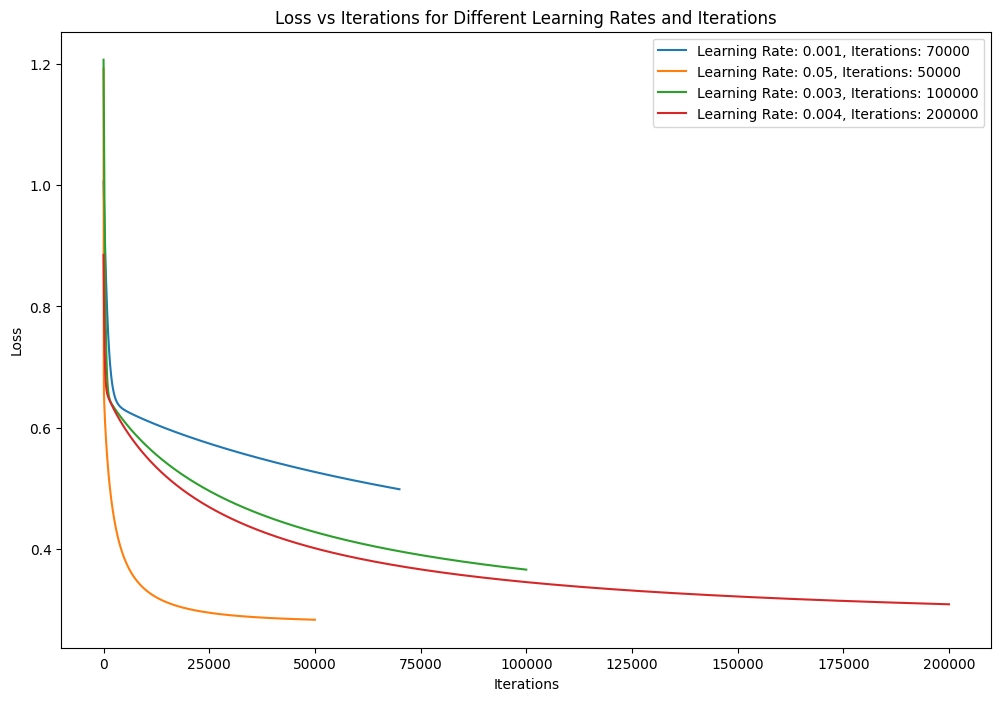

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

for i, loss_h in enumerate(losses):
    plt.plot(loss_h, label=parameters[i])

plt.title('Loss vs Iterations for Different Learning Rates and Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

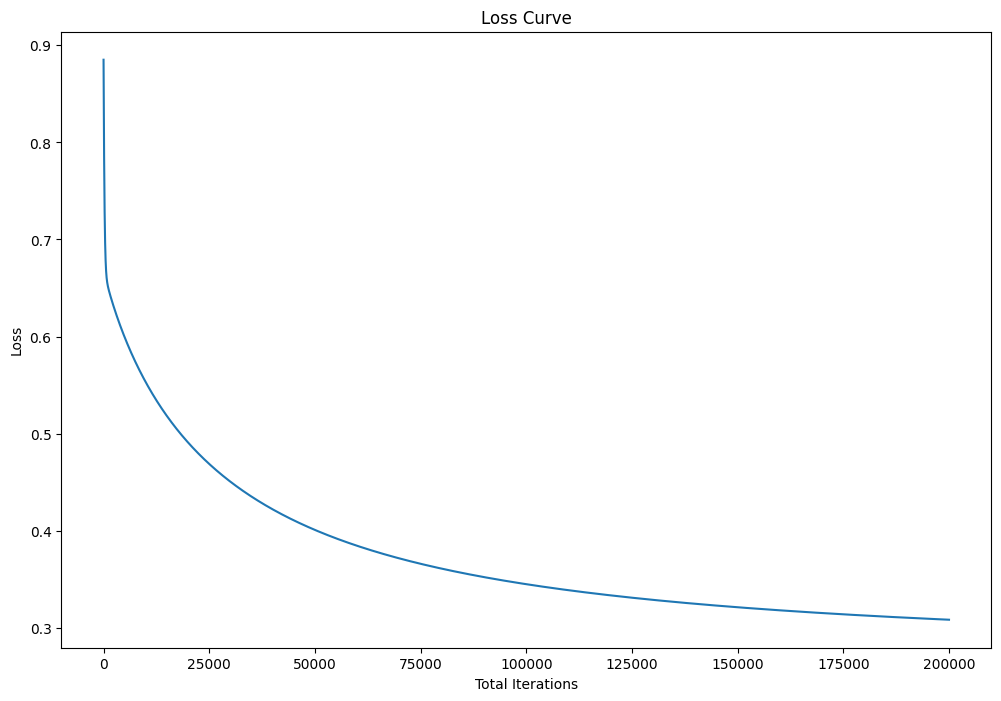

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(loss_all)
plt.xlabel('Total Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

In [20]:
import pickle
with open('best_logistic_regression_model_penguin.pkl', 'wb') as file:
    pickle.dump({
        'learning_rate': best_parameters['learning_rate'],
        'iterations': best_parameters['iterations'],
        'initial_w':best_parameters['initial_w']
    }, file)

print("Best model saved as 'best_logistic_regression_model_penguin.pkl'")


Best model saved as 'best_logistic_regression_model_penguin.pkl'


In [22]:
import pickle
with open('best_logistic_regression_model_penguin.pkl', 'rb') as file:
        model_data = pickle.load(file)
print("Best Model details:")
print("Learning Rate:", model_data['learning_rate'])
print("Iterations:", model_data['iterations'])
print("Initial Weights:", model_data['initial_w']) 



Best Model details:
Learning Rate: 0.004
Iterations: 200000
Initial Weights: [0.65950413 0.57372585 0.16720825 0.97501122 0.23521137 0.27636618
 0.11718809 0.02676592 0.25228132 0.39888528]
